In [1]:
import pandas as pd
import numpy as np
import matplotlib as ptl

In [5]:
df_temp = pd.read_csv("./archivos/GlobalLandTemperaturesByCountry.csv", encoding="utf-8")
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [6]:
df_temp.shape

(577462, 4)

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [13]:
df_temp["year"] = pd.to_datetime(df_temp["dt"])
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01
1,1743-12-01,NaN,NaN,Åland,1743-12-01
2,1744-01-01,NaN,NaN,Åland,1744-01-01
3,1744-02-01,NaN,NaN,Åland,1744-02-01
4,1744-03-01,NaN,NaN,Åland,1744-03-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [20]:
idx = df_temp["year"] > pd.to_datetime("1970-01-01")
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [25]:
df_t_avg = df_temp.groupby(["Country",
pd.Grouper(key="year", freq= "1Y")]).agg({"AverageTemperature":[np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

<AxesSubplot:xlabel='year'>

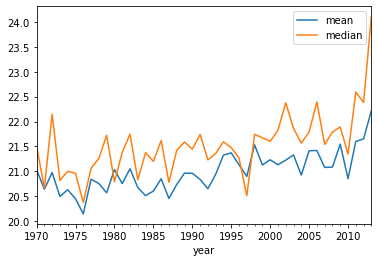

In [31]:
df_t_avg.xs("Mexico")["AverageTemperature"].plot()

In [36]:
df_t_med = df_t_avg["AverageTemperature"][["median"]].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [39]:
df_t_med["justyear"] = df_t_med["year"].dt.year
df_t_med

,Country,year,median,justyear
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012



Con esto nos ahorramos guardar el resultado de la sentencia en el df (df= a*b)
[code...],inplace=True

In [40]:
df_t_med.rename(columns={"median":"Temperature"},inplace=True)
df_t_med

,Country,year,Temperature,justyear
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [44]:
df_t_pivot = df_t_med.pivot_table(values="Temperature", index="justyear", columns="Country")
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
justyear,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


<AxesSubplot:>

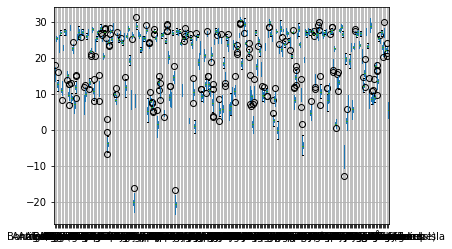

In [45]:
df_t_pivot.boxplot()

In [46]:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
justyear,,,,,,,,,,,,,,,,,,,,,
2002,16.4970,25.741,12.5335,23.8485,27.7370,11.8895,23.488,27.7745,27.5745,15.530,...,18.2875,13.8335,25.784,25.0420,27.5530,23.0610,27.3385,23.1025,23.101,3.9725
1996,14.5665,25.365,11.7315,23.2925,27.2245,11.1270,23.168,27.1605,27.0600,15.441,...,18.4705,11.9735,25.570,24.0215,26.7825,23.7365,27.0405,22.3725,22.668,5.0130


<AxesSubplot:>

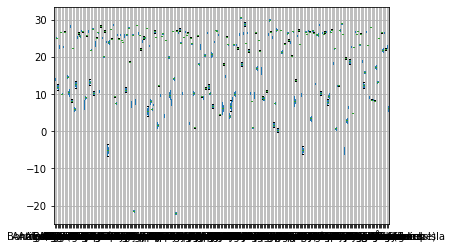

In [47]:
df_t_pivot.sample(2).boxplot()

Hacemos la transpuesta

In [48]:
df_t_pivot.T.sample(2)

justyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Iraq,23.495,21.0635,23.5670,23.1715,22.3770,22.325,22.183,21.4355,23.434,23.7445,...,23.4810,23.3680,23.7295,23.2435,24.386,23.3620,24.642,22.834,24.6715,24.8095
Niue,25.425,25.1290,25.1835,25.7715,25.6755,25.447,25.063,24.9845,24.886,25.3105,...,25.7615,26.0295,25.4150,26.0525,25.754,24.7665,25.947,25.929,26.0600,26.4835


In [52]:
df_t_pivot.T.sample(2).T.head(2)

Country,India,Vietnam
justyear,,
1970,25.975,24.6330
1971,24.975,24.1105


<AxesSubplot:>

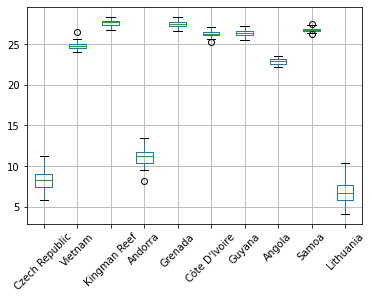

In [55]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)